## Bird's eye view.

# Importing necessary module

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import spacy

## reading datasets

In [2]:
train=pd.read_csv(r'D:\Downloads\fake-news\train.csv')
test=pd.read_csv(r'D:\Downloads\fake-news\test.csv')
sub=pd.read_csv(r'D:\Downloads\fake-news\submit.csv')

In [3]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
train.shape

(20800, 5)

# Some traditional text cleaning
In text cleaning we will remove stop words(so,and,the etc.), Punctuations and performe Lemmatization (converts words to its root form eg.working->work) on words. For accomplisement of all these stuff first we will have to tockenize (split the document into words or sentences) the ducuments.

### Loading a pretrained model for english language.
For tockenization we need a model so, here we will load a pretrained model from spacy, we can make our one using regrex.

In [5]:
nlp=spacy.load('en_core_web_sm')
stopwords=spacy.lang.en.stop_words.STOP_WORDS #List of stop words.

### Preparing data

In [6]:
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
train.dropna(subset=['text'],inplace=True) # We will make our model based on the news content only,that why we are only worry about the missing data in text columns.

In [8]:
train=train[['text','label']]
train.head()

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1


doc=nlp(train.text[0])
spacy.displacy.serve(doc,style='ent')

## Demonstration of model working.
Here, you will get a broad idea that how this pretrained model work,so that you can easily understand the below functions.

In [9]:
doc=nlp(train.text[0]) 
#Split the whole news into chunks of words,means this is for tockenization, this instance 
#also have many functionality later on you get familiar with these all.
#We can access everything tockens,parts of peech tag, named entities by interating over doc instance, and that the thing we will use in all Function.
# Now i can hope you will able to understand everyting.


## functions for the text mining.

In [15]:
def only_alpha(text):  # Keep only alphabets,keep in mind that it will keep alphabets of any country.
    doc=nlp(text)   
    alpha=[w.text for w in doc if w.text.isalpha() and w not in stopwords] #W.text to access tocken
    return ' '.join(alpha)

def count_pos_tag(text): #Returns the count of noun,proper noun and pronouns for each news.
    doc=nlp(text)
    tags=[w.pos_ for w in doc] # W.pos_ gives us part of speech tag for that word.
    return tags.count('NOUN'),tags.count('PROPN'),tags.count('PRON')

def count_named_entity(text): # Returns the numbers of person,location,organisation,political groups ,mentioned in the news content.
    doc=nlp(text)
    entity=[w.label_ for w in doc.ents] # W.label_ tell us entity eg. person or place or organisation
    return entity.count('PERSON'),entity.count('GPE'),entity.count('NORP'),entity.count('ORG')

def lemma(text):      #Lemmatize the word
    doc=nlp(text)
    lemma=[w.lemma_ for w in doc] #W.lemma_ lemmatize the word.
    return " ".join(lemma)

def preprocessing(data): #A combined function to all the text mining works.
    data=pd.DataFrame(data,columns=['text'])
    data.text=data.text.apply(only_alpha)
    data.text=data.text.str.lower()
    print('wooh, have Only alphabetic char ')
    data['noun_count'],data['pnoun_count'],data['pron_count']=np.array(list(data.text.apply(count_pos_tag))).T
    print('Tagged pos')
    data['num_person'],data['num_places'],data['num_national_gr'],data['num_organisation']=np.array(list(data.text.apply(count_named_entity))).T
    print('lemmatisation starts')
    data.text=data.text.apply(lemma)
    return data
    


In [11]:
feature=train.text #On which we will performe text cleaning.
label=train.label

## Performing text cleaning
We can do all the steps by applying above preprocessing function,but for now we will do all steps separately for better understading.Durring pipeline generation we will use that function.so keep petience and move forward.

Now we will performe 2 steps of text cleaning, Removing punctuations and converting to lower case, then based on this we will generate some important features, after that we performe rest of the steps i.e stop words removal and lemmatization.

In [12]:
import timeit
%timeit preprocessing(feature[:1])

wooh, have Only alphabetic char 
Tagged pos
lemmatisation starts
wooh, have Only alphabetic char 
Tagged pos
lemmatisation starts
wooh, have Only alphabetic char 
Tagged pos
lemmatisation starts
wooh, have Only alphabetic char 
Tagged pos
lemmatisation starts
wooh, have Only alphabetic char 
Tagged pos
lemmatisation starts
wooh, have Only alphabetic char 
Tagged pos
lemmatisation starts
wooh, have Only alphabetic char 
Tagged pos
lemmatisation starts
wooh, have Only alphabetic char 
Tagged pos
lemmatisation starts
540 ms ± 26.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [121]:
500/7*len(feature)/1000/60 #It will take approx half an hour to complete all steps.

24.71547619047619

In [126]:
feature=feature.apply(only_alpha) #Removes all non-alphabetic chars

In [137]:
# You can see all the punctuation have been removed.
feature[:5]

0    House Dem Aide We Did Even See Comey Letter Un...
1    Ever get the feeling your life circles the rou...
2    Why the Truth Might Get You Fired October The ...
3    Videos Civilians Killed In Single US Airstrike...
4    Print An Iranian woman has been sentenced to s...
Name: text, dtype: object

In [140]:
feature=feature.str.lower() #Converts to lower case.
feature[:5]

0    house dem aide we did even see comey letter un...
1    ever get the feeling your life circles the rou...
2    why the truth might get you fired october the ...
3    videos civilians killed in single us airstrike...
4    print an iranian woman has been sentenced to s...
Name: text, dtype: object

In [141]:
f=feature.copy()

In [155]:
feature=pd.DataFrame(feature)
#Adding columns for number of noun,proper noun and pronouns.
feature['noun_count'],feature['pnoun_count'],feature['pron_count']=np.array(list(feature.text.apply(count_pos_tag))).T
feature.head()

,text,noun_count,pnoun_count,pron_count
0,house dem aide we did even see comey letter un...,159,74,62
1,ever get the feeling your life circles the rou...,144,51,52
2,why the truth might get you fired october the ...,254,107,69
3,videos civilians killed in single us airstrike...,123,51,21
4,print an iranian woman has been sentenced to s...,40,7,5


In [157]:
# Adding columns for count of each entity(person,place,organisation etc.)
feature['num_person'],feature['num_places'],feature['num_national_gr'],feature['num_organisation']=np.array(list(feature.text.apply(count_named_entity))).T

In [158]:
feature.text=feature.text.apply(lemma)#Lemmatize the words(tockens)
feature.head()

,text,noun_count,pnoun_count,pron_count,num_person,num_places,num_national_gr,num_organisation
0,house dem aide -PRON- do even see comey letter...,159,74,62,15,2,17,17
1,ever get the feeling -PRON- life circle the ro...,144,51,52,17,2,6,3
2,why the truth may get -PRON- fire october the ...,254,107,69,20,18,7,7
3,video civilian kill in single us airstrike hav...,123,51,21,2,15,12,1
4,print an iranian woman have be sentence to six...,40,7,5,0,0,2,2


In [14]:
#Lets see how these all steps could be done by a single of code using preprocessing function
preprocessing(train.text[:10])

wooh, have Only alphabetic char 
Tagged pos
lemmatisation starts


,text,noun_count,pnoun_count,pron_count,num_person,num_places,num_national_gr,num_organisation
0,house dem aide -PRON- do even see comey letter...,159,74,62,15,2,17,17
1,ever get the feeling -PRON- life circle the ro...,144,51,52,17,2,6,3
2,why the truth may get -PRON- fire october the ...,254,107,69,20,18,7,7
3,video civilian kill in single us airstrike hav...,123,51,21,2,15,12,1
4,print an iranian woman have be sentence to six...,40,7,5,0,0,2,2
5,in these try time jackie mason be the voice of...,33,24,22,8,5,1,0
6,ever wonder how britain most iconic pop pianis...,116,40,19,11,3,1,0
7,paris france choose an idealistic traditional ...,166,78,38,19,5,3,6
8,donald trump be schedule to make a highly anti...,262,76,108,5,13,24,4
9,a week before michael flynn resign as national...,325,265,70,45,44,34,12


In [6]:
train=feature.join(label)
train.to_csv(r'D:\Downloads\fake-news\trainv2.0.csv',index=False)#preprocessed data

NameError: name 'feature' is not defined

In [16]:
train=pd.read_csv(r'D:\Downloads\fake-news\trainv2.0.csv')
train.head()

,text,noun_count,pnoun_count,pron_count,num_person,num_places,num_national_gr,num_organisation,label
0,house dem aide -PRON- do even see comey letter...,159,74,62,15,2,17,17,1
1,ever get the feeling -PRON- life circle the ro...,144,51,52,17,2,6,3,0
2,why the truth may get -PRON- fire october the ...,254,107,69,20,18,7,7,1
3,video civilian kill in single us airstrike hav...,123,51,21,2,15,12,1,1
4,print an iranian woman have be sentence to six...,40,7,5,0,0,2,2,1


In [17]:
train.isnull().sum()

text                81
noun_count           0
pnoun_count          0
pron_count           0
num_person           0
num_places           0
num_national_gr      0
num_organisation     0
label                0
dtype: int64

In [18]:
train.dropna(inplace=True)

### Comparison of Noun,proper noun and pronouns used in the title.
we can clearly see that the fake news contains more number of  pronouns than the proper noun(named entity).So, it can contribute in classification.

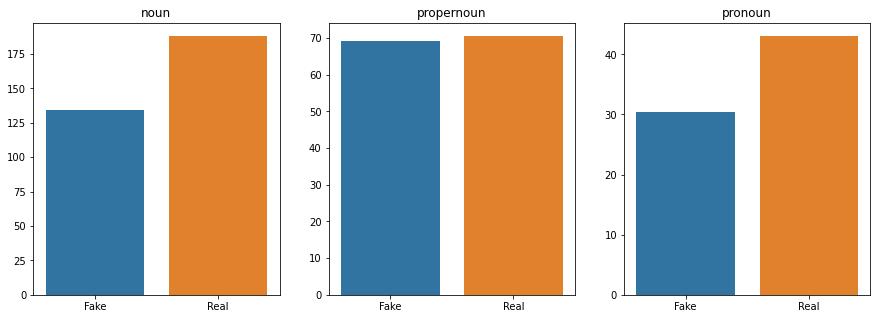

In [19]:
def compare_plot(feature,ax=None):
    Fake_mean=train.loc[train.label==1,feature].mean()
    Real_mean=train.loc[train.label==0,feature].mean()
    sns.barplot(x=['Fake','Real'],y=[Fake_mean,Real_mean],ax=ax)
_,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5)) 
ax=ax.flatten()
compare_plot('noun_count',ax[0])
compare_plot('pnoun_count',ax[1])
compare_plot('pron_count',ax[2],)
for end,title in enumerate(['noun','propernoun','pronoun']):
    ax[end].set(title=title)

In [ ]:
_,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5)) 
ax=ax.flatten()
compare_plot('num_person',ax[0])
compare_plot('num_place',ax[1])
compare_plot('num_organisation',ax[2],)
for end,title in enumerate(['person','place','organisation']):
    ax[end].set(title=title)

## Vectorization
Vectorization means creating numeric representation of the documents. Lets take Coutvectorizer as example, Countvectorizer creats a list of all unique vocabulary from the entire documents(dataset),set them as columns and count the number of occurences of each word(vocab) in each row and put it as values,which represents the text of that row.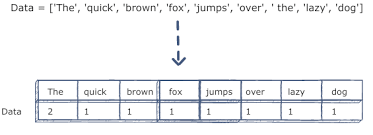

In [20]:
train.index=list(range(len(train)))
feature=train.drop('label',axis=1)
label=train.label
feature.shape

(20680, 8)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
#We, are already familiar with CountVectorizer and its working ,below is a short note on Tfidf.
#tfidf also works ecaxtly like the count vectorixer but give more weightaage to the rare words,thats the difference.

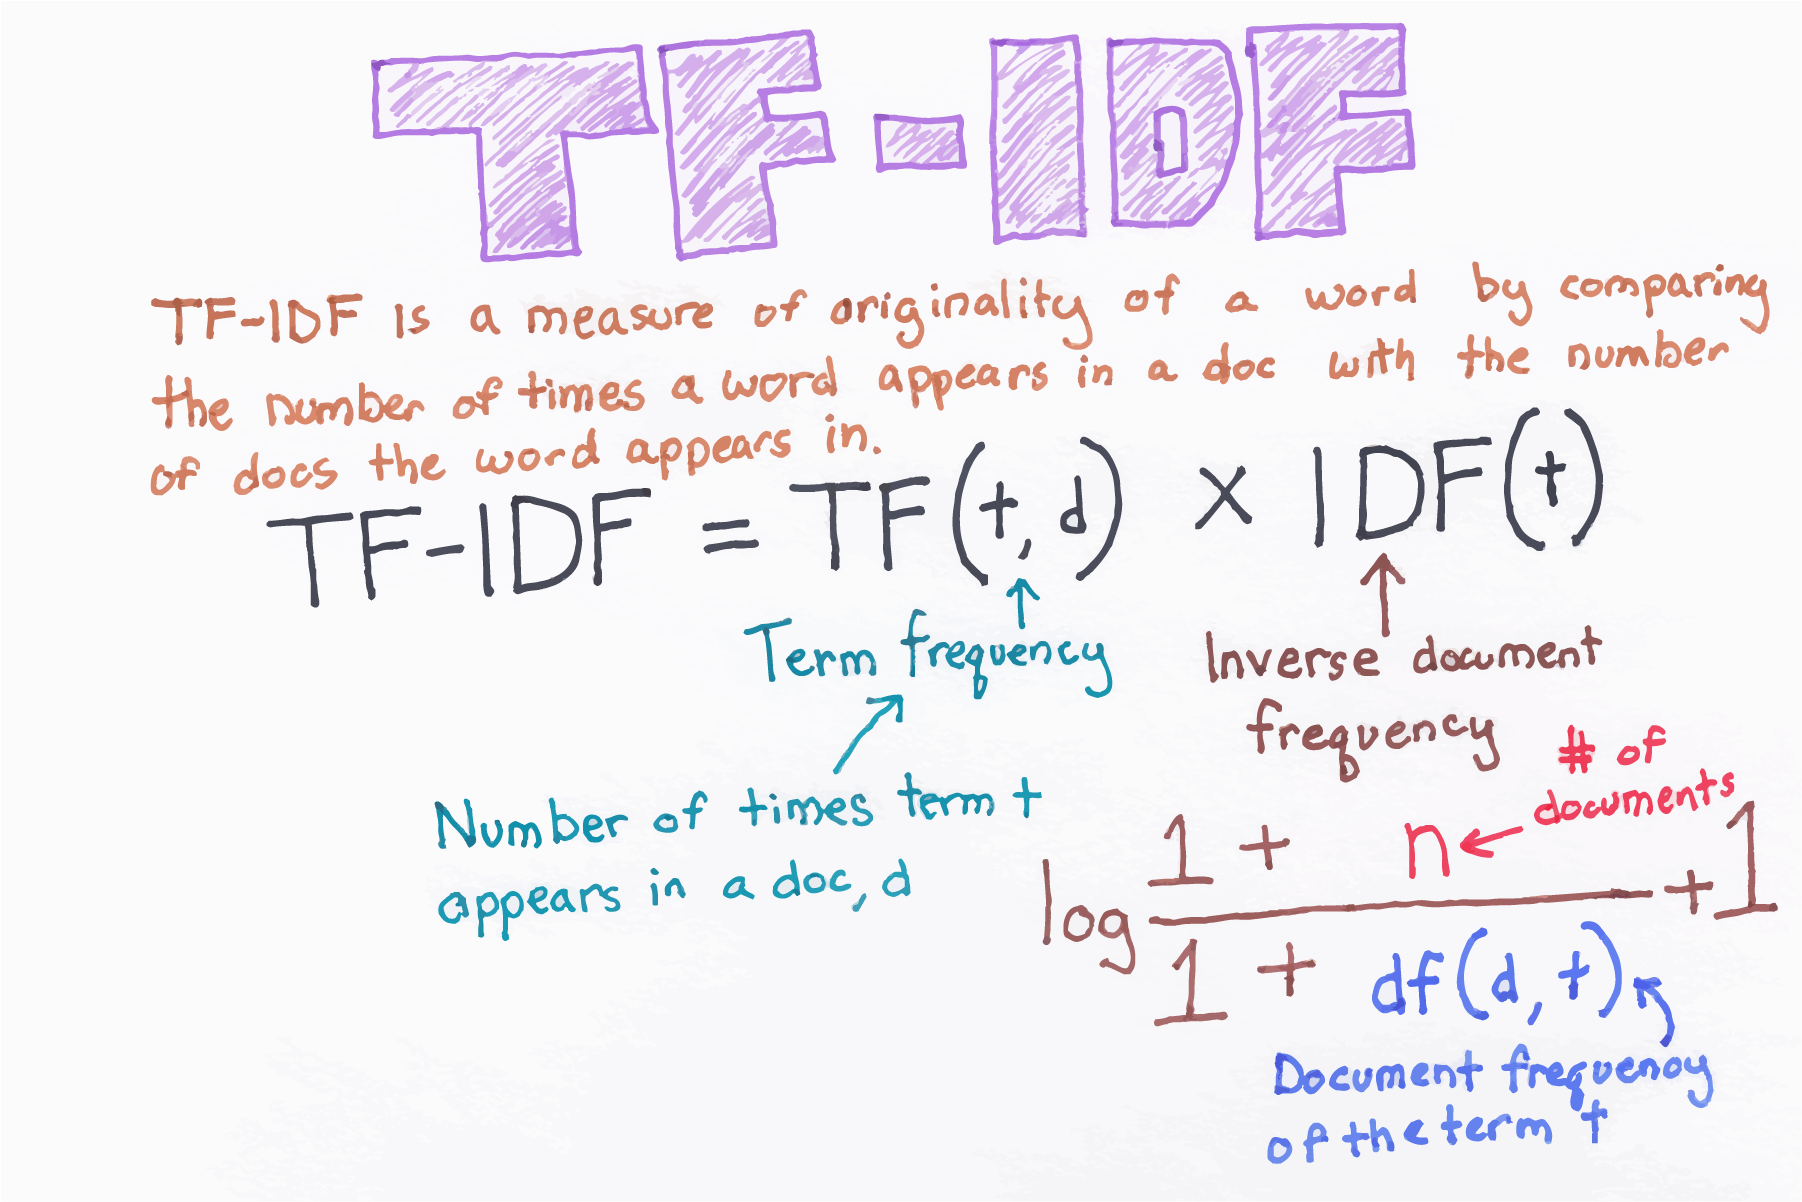

If you noticed that, we left with the last processing step i.e stopwords removel, we will sone this by just specifying a argument in tfidf

In [22]:
tfidf_vectorizer=TfidfVectorizer(ngram_range=(1,1),stop_words='english')
vectors=tfidf_vectorizer.fit_transform(feature.text)

In [27]:
vectors 
# This is a sparce matrix of tfidf corpus,it contains a huge amount of data of shape approx (200680,155000),
#so a 8gb ram unable to allocate that huge memory.We can review this to make another tfidf vector on lesser data.
#lets review it

<20680x155019 sparse matrix of type '<class 'numpy.float64'>'
	with 4696593 stored elements in Compressed Sparse Row format>

In [31]:
tfidf_vectorizer.transform(feature.text[:1]).A #we can see must of the columns having 0 values,mut definetlly not all.so the dimensality reduction becomes a import steps

array([[0., 0., 0., ..., 0., 0., 0.]])

## Dimensality reduction by NMF
NMF decomposes multivariate data by creating a user-defined number of features. Each feature is a linear combination of the original attribute set; the coefficients of these linear combinations are non-negative.

NMF decomposes a data matrix V into the product of two lower rank matrices W and H so that V is approximately equal to W times H. NMF uses an iterative procedure to modify the initial values of W and H so that the product approaches V. The procedure terminates when the approximation error converges or the specified number of iterations is reached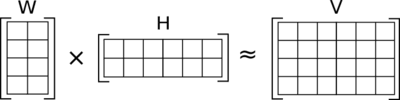

In [32]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer
norm=Normalizer()
nmf=NMF(n_components=50)
vectors=norm.fit_transform(vectors)
vectors=nmf.fit_transform(vectors)

C:\Users\pankaj\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [33]:
vectors=pd.DataFrame(vectors)
vectors=vectors.join(feature.drop('text',axis=1))
vectors.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,noun_count,pnoun_count,pron_count,num_person,num_places,num_national_gr,num_organisation
0,0.036481,0.000000,0.000000,0.008563,0.000000,0.0,0.000000,0.016884,0.000148,0.000000,...,0.004541,0.000000,0.000558,159,74,62,15,2,17,17
1,0.062515,0.025288,0.001488,0.000000,0.000000,0.0,0.000000,0.004483,0.000000,0.006133,...,0.000000,0.000000,0.000000,144,51,52,17,2,6,3
2,0.046922,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.001083,0.000000,...,0.061632,0.002661,0.002700,254,107,69,20,18,7,7
3,0.015994,0.000000,0.000000,0.000794,0.000000,0.0,0.010903,0.000000,0.000000,0.000000,...,0.002165,0.000000,0.000901,123,51,21,2,15,12,1
4,0.006232,0.000000,0.000000,0.000965,0.000256,0.0,0.001293,0.000000,0.000000,0.000261,...,0.014012,0.000000,0.000000,40,7,5,0,0,2,2


## Model validation part-I

In [34]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

lgb=LGBMClassifier()
X_train,X_test,y_train,y_test=train_test_split(vectors,label)
lgb.fit(X_train,y_train)
accuracy_score(y_test,lgb.predict(X_test))

0.8998065764023211

If notice that this validation method is not fair, as we creat tfidf vectors without separating train and test data,here data leakage have been done.now we will performe Stratified model validation and create separate tfidf for X_train and X_test. To make this easy we first make a pipeline for this whole work

## Kfold validation

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold

In [41]:
skf=StratifiedKFold(n_splits=5) #validate for 5 split
pipeline=make_pipeline(tfidf_vectorizer,norm,nmf) #A pipeline to performme vectorization,normalisation and dimensality reduction

In [37]:
#This is the code of stratified model validation.
accuracy=np.array([])
for trainind,testind in skf.split(feature,label):
    X_train,X_test,y_train,y_test=feature.iloc[trainind],feature.iloc[testind],label[trainind],label[testind]
    vector_train=pipeline.fit_transform(X_train.text)
    
    vector_train=pd.DataFrame(vector_train)
    vector_train.join(X_train.drop('text',axis=1))
    
    vector_val=pipeline.transform(X_test.text)
    vector_val=pd.DataFrame(vector_val)
    X_test.index=list(range(len(X_test)))
    vector_val.join(X_test.drop('text',axis=1))
    
    lgb.fit(vector_train,y_train)
    
    y_pred=lgb.predict(vector_val)
    accuracy=np.append(accuracy,accuracy_score(y_test,y_pred))  

C:\Users\pankaj\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\pankaj\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\pankaj\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\pankaj\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [43]:
accuracy.mean()

0.8945357833655706

## Training a lightlgm model on full dataset

training=pipeline.fit_transform(feature.text)
training=pd.DataFrame(training)
training=training.join(feature.drop('text',axis=1))
training.head()

In [44]:
training_data=vectors #As we know we stored tfidf data of whole dataset in vectors.

In [45]:
training_data.to_csv(r'D:\Downloads\fake-news\trainv2.1.csv')

In [46]:
#training=pd.DataFrame(pipeline.fit_transform(feature.text))
#training.join(feature.drop('text',axis=1))
lgb.fit(training_data,label)

LGBMClassifier()

In [57]:
test=[input('enter the text of news')]
test=preprocessing(test)
test_=pd.DataFrame(pipeline.transform(test.text))
test_=test_.join(test.drop('text',axis=1))
if lgb.predict(test_)[0]==1:
    print('prediction: News is Fake')
else:
    print('prediction: news is Real')

enter the text of newsOn Sunday, December 4, 2016, a shooting incident occurred at a pizza shop in northwestern Washington D.C. during the middle of the day. This was in a busy but peaceful shopping district, and the shop was filled with families. A man brought a rifle into the shop and began shooting. Fortunately, no one was hurt, and the suspect was arrested, but the motive for this crime and the circumstances that triggered it were shocking.  The pizza shop, called Comet Ping Pong, had become embroiled in a strange situation due to an event that had occurred about one month earlier. There were false tweets widely spread on the net claiming that this pizza shop was the base for a pedophile sex ring involving Democratic presidential candidate Hillary Clinton, a former Secretary of State, and members of her campaign. The operators of the pizza shop began receiving threats from right wing activists who believed that the reports were true.  According to The Washington Post, the trigger w

## testset prediction

In [44]:
test=pd.read_csv(r'D:\Downloads\fake-news\test.csv')
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [46]:
sub.head()

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1


In [47]:
test.shape

(5200, 4)

In [49]:
test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [50]:
test.text.fillna('Noting',inplace=True)

In [51]:
test=preprocessing(test)
test_=pd.DataFrame(pipeline.transform(test.text))
#test_.join(test.drop('text',axis=1))
final_predict=lgb.predict(test_) 

Only alphabetic
lemmatisation starts


In [52]:
t=pd.read_csv(r'D:\Downloads\fake-news\test.csv')
submission=t[['id']]
submission['label']=final_predict

C:\Users\pankaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
submission.to_csv(r'D:\Downloads\fake-news\basesubmission.csv',index=False)